In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

## Baseline Models with Regularization

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as skm

### Logistic Regression

In [ ]:
# Run Regularized Logistic Regression
lr = LogisticRegression(random_state = 23)

lr.fit(X_train, y_train)

y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

y_train_proba_lr = lr.predict_proba(X_train)
y_test_proba_lr = lr.predict_proba(X_test)

In [ ]:
print("Train Confusion Matrix: \n", skm.confusion_matrix(y_train, y_train_pred_lr))
print("Accuracy Train:", skm.accuracy_score(y_train, y_train_pred_lr))
print("Precision Train:", skm.precision_score(y_train, y_train_pred_lr))
print("Recall Train:", skm.recall_score(y_train, y_train_pred_lr))
print("AUC score", skm.roc_auc_score(y_train, y_train_proba_lr[:,1]))

print("\n Test Confusion Matrix: \n", skm.confusion_matrix(y_test, y_test_pred_lr))
print("Accuracy Test:", skm.accuracy_score(y_test, y_test_pred_lr))
print("Precision Test:", skm.precision_score(y_test, y_test_pred_lr))
print("Recall Test:", skm.recall_score(y_test, y_test_pred_lr))
print("AUC score", skm.roc_auc_score(y_test, y_test_proba_lr[:,1]))

Train Confusion Matrix: 
 [[223883     13]
 [ 19848     12]]
Accuracy Train: 0.9185209799963898
Precision Train: 0.48
Recall Train: 0.0006042296072507553
AUC score 0.6998061444852958

 Test Confusion Matrix: 
 [[55976     0]
 [ 4962     3]]
Accuracy Test: 0.9185769842962865
Precision Test: 1.0
Recall Test: 0.0006042296072507553
AUC score 0.7040026613333494


### Random Forest

In [ ]:
# Run Random Forest Classifier
rf = RandomForestClassifier(max_depth = 20, random_state = 23)

rf.fit(X_train, y_train)

y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

y_train_proba_rf= rf.predict_proba(X_train)
y_test_proba_rf= rf.predict_proba(X_test)

In [ ]:
print("Train Confusion Matrix: \n", skm.confusion_matrix(y_train, y_train_pred_rf))
print("Accuracy Train:", skm.accuracy_score(y_train, y_train_pred_rf))
print("Precision Train:", skm.precision_score(y_train, y_train_pred_rf))
print("Recall Train:", skm.recall_score(y_train, y_train_pred_rf))
print("AUC score", skm.roc_auc_score(y_train, y_train_proba_rf[:,1]))

print("\n Test Confusion Matrix: \n", skm.confusion_matrix(y_test, y_test_pred_rf))
print("Accuracy Test:", skm.accuracy_score(y_test, y_test_pred_rf))
print("Precision Test:", skm.precision_score(y_test, y_test_pred_rf))
print("Recall Test:", skm.recall_score(y_test, y_test_pred_rf))
print("AUC score", skm.roc_auc_score(y_test, y_test_proba_rf[:,1]))

Train Confusion Matrix: 
 [[223896      0]
 [ 16909   2951]]
Accuracy Train: 0.9306314511232544
Precision Train: 1.0
Recall Train: 0.1485901309164149
AUC score 0.9944628487237152

 Test Confusion Matrix: 
 [[55976     0]
 [ 4964     1]]
Accuracy Test: 0.9185441656684334
Precision Test: 1.0
Recall Test: 0.0002014098690835851
AUC score 0.6882309617371624


### Naive Bayes Classifier

In [ ]:
# Run Naive Bayes Classifier
gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_train_pred_gnb = gnb.predict(X_train)
y_test_pred_gnb = gnb.predict(X_test)

y_train_proba_gnb = gnb.predict_proba(X_train)
y_test_proba_gnb = gnb.predict_proba(X_test)

In [ ]:
print("Train Confusion Matrix: \n", skm.confusion_matrix(y_train, y_train_pred_gnb))
print("Accuracy Train:", skm.accuracy_score(y_train, y_train_pred_gnb))
print("Precision Train:", skm.precision_score(y_train, y_train_pred_gnb))
print("Recall Train:", skm.recall_score(y_train, y_train_pred_gnb))
print("AUC score", skm.roc_auc_score(y_train, y_train_proba_gnb[:,1]))

print("\n Test Confusion Matrix: \n", skm.confusion_matrix(y_test, y_test_pred_gnb))
print("Accuracy Test:", skm.accuracy_score(y_test, y_test_pred_gnb))
print("Precision Test:", skm.precision_score(y_test, y_test_pred_gnb))
print("Recall Test:", skm.recall_score(y_test, y_test_pred_gnb))
print("AUC score", skm.roc_auc_score(y_test, y_test_proba_gnb[:,1]))

Train Confusion Matrix: 
 [[  4906 218990]
 [   233  19627]]
Accuracy Train: 0.10064572769490802
Precision Train: 0.0822531504461124
Recall Train: 0.9882678751258812
AUC score 0.6425088491038369

 Test Confusion Matrix: 
 [[ 1207 54769]
 [   63  4902]]
Accuracy Test: 0.10024449877750612
Precision Test: 0.08215045834660052
Recall Test: 0.9873111782477342
AUC score 0.6430602559347475


## Model Performance Improvement

### SMOTE + Random Under-sampling

#### Oversampling minority class using SMOTE and Undersampling Majority Class using Randomundersampling (USM)

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn import metrics as skm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


#### We first oversample the minority class to the same size of majority class and check AUC Score

In [ ]:
smote = SMOTE(sampling_strategy=1)
X_train_smote, y_train_smote = smote.fit_sample(X_train.astype('float'), y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print("Before usm: ", Counter(y_train))
print("After usm: ", Counter(y_train_smote))

Before usm:  Counter({0: 223896, 1: 19860})
After usm:  Counter({0: 223896, 1: 223896})


##### Logistic Regression

In [ ]:
# Run Regularized Logistic Regression
lr1 = LogisticRegression(random_state = 23)

lr1.fit(X_train_smote, y_train_smote)

y_train_pred_lr_smote = lr1.predict(X_train_smote)
y_test_pred_lr_smote = lr1.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
y_test_proba_lr_smote = lr1.predict_proba(X_test)

In [ ]:
print("Test Confusion Matrix: \n", skm.confusion_matrix(y_test, y_test_pred_lr_smote))
print("Accuracy Train:", skm.accuracy_score(y_train_smote, y_train_pred_lr_smote))
print("Precision Train:", skm.precision_score(y_train_smote, y_train_pred_lr_smote))
print("Recall Train:", skm.recall_score(y_train_smote, y_train_pred_lr_smote))
print("Accuracy Test:", skm.accuracy_score(y_test, y_test_pred_lr_smote))
print("Precision Test:", skm.precision_score(y_test, y_test_pred_lr_smote))
print("Recall Test:", skm.recall_score(y_test, y_test_pred_lr_smote))
print("AUC score", skm.roc_auc_score(y_test, y_test_proba_lr_smote[:,1]))

Test Confusion Matrix: 
 [[37251 18725]
 [ 1883  3082]]
Accuracy Train: 0.659545056633437
Precision Train: 0.6608272440356399
Recall Train: 0.6555588308857684
Accuracy Test: 0.6618368586009419
Precision Test: 0.1413307653505755
Recall Test: 0.6207452165156092
AUC score 0.6972187260228488


##### Random Forest

In [ ]:
# run rf with oversampling only
rf1 = RandomForestClassifier()

rf1.fit(X_train_smote, y_train_smote)

y_train_pred_rf_smote = rf1.predict(X_train_smote)
y_test_pred_rf_smote = rf1.predict(X_test)
y_test_proba_rf_smote = rf1.predict_proba(X_test)

In [ ]:
print("Accuracy Train:", skm.accuracy_score(y_train_smote, y_train_pred_rf_smote))
print("Precision Train:", skm.precision_score(y_train_smote, y_train_pred_rf_smote))
print("Recall Train:", skm.recall_score(y_train_smote, y_train_pred_rf_smote))
print("Accuracy Test:", skm.accuracy_score(y_test, y_test_pred_rf_smote))
print("Precision Test:", skm.precision_score(y_test, y_test_pred_rf_smote))
print("Recall Test:", skm.recall_score(y_test, y_test_pred_rf_smote))
print(skm.roc_auc_score(y_test, y_test_proba_rf_smote[:,1]))

Accuracy Train: 0.9999977668203094
Precision Train: 1.0
Recall Train: 0.9999955336406189
Accuracy Test: 0.9156561264173545
Precision Test: 0.23564954682779457
Recall Test: 0.01570996978851964
0.6753315764301807


##### Naive Bayes

In [ ]:
# Run Naive Bayes Classifier
gnb1 = GaussianNB()

gnb1.fit(X_train_smote, y_train_smote)

y_train_pred_gnb1 = gnb1.predict(X_train_smote)
y_test_pred_gnb1 = gnb1.predict(X_test)
y_test_proba_gnb1_smote = gnb1.predict_proba(X_test)

In [ ]:
print("Test Confusion Matrix: \n", skm.confusion_matrix(y_test, y_test_pred_gnb1))
print("Accuracy Train:", skm.accuracy_score(y_train_smote, y_train_pred_gnb1))
print("Precision Train:", skm.precision_score(y_train_smote, y_train_pred_gnb1))
print("Recall Train:", skm.recall_score(y_train_smote, y_train_pred_gnb1))
print("Accuracy Test:", skm.accuracy_score(y_test, y_test_pred_gnb1))
print("Precision Test:", skm.precision_score(y_test, y_test_pred_gnb1))
print("Recall Test:", skm.recall_score(y_test, y_test_pred_gnb1))
print("AUC score", skm.roc_auc_score(y_test, y_test_proba_gnb1_smote[:,1]))

Test Confusion Matrix: 
 [[ 1331 54645]
 [   66  4899]]
Accuracy Train: 0.5063042662664808
Precision Train: 0.5032078160261262
Recall Train: 0.9889457605316754
Accuracy Test: 0.10223002576262287
Precision Test: 0.08227529222087868
Recall Test: 0.9867069486404834
AUC score 0.6354473795487953


#### Now we undersample the majority class to the same size of minority class and check AUC Score

In [ ]:
# extreme undersampling major class 
under = RandomUnderSampler(sampling_strategy=1)
X_train_usm, y_train_usm = under.fit_sample(X_train.astype('float'), y_train)
print("Before usm: ", Counter(y_train))
print("After usm: ", Counter(y_train_usm))

Before usm:  Counter({0: 223896, 1: 19860})
After usm:  Counter({0: 19860, 1: 19860})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


##### Logistic Regression

In [ ]:
# Run Regularized Logistic Regression
lr2 = LogisticRegression(random_state = 23)

lr2.fit(X_train_usm, y_train_usm)

y_train_pred_lr_usm = lr2.predict(X_train_usm)
y_test_pred_lr_usm = lr2.predict(X_test)

y_train_proba_lr_usm = lr2.predict_proba(X_train_usm)
y_test_proba_lr_usm = lr2.predict_proba(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print("Train Confusion Matrix: \n", skm.confusion_matrix(y_train_usm, y_train_pred_lr_usm))
print("Accuracy Train:", skm.accuracy_score(y_train_usm, y_train_pred_lr_usm))
print("Precision Train:", skm.precision_score(y_train_usm, y_train_pred_lr_usm))
print("Recall Train:", skm.recall_score(y_train_usm, y_train_pred_lr_usm))
print("AUC score", skm.roc_auc_score(y_train_usm, y_train_proba_lr_usm[:,1]))
print("\n Test Confusion Matrix: \n", skm.confusion_matrix(y_test, y_test_pred_lr_usm))
print("Accuracy Test:", skm.accuracy_score(y_test, y_test_pred_lr_usm))
print("Precision Test:", skm.precision_score(y_test, y_test_pred_lr_usm))
print("Recall Test:", skm.recall_score(y_test, y_test_pred_lr_usm))
print("AUC score", skm.roc_auc_score(y_test, y_test_proba_lr_usm[:,1]))

Train Confusion Matrix: 
 [[13197  6663]
 [ 7327 12533]]
Accuracy Train: 0.6477844914400805
Precision Train: 0.6528964367576578
Recall Train: 0.631067472306143
AUC score 0.7021293591900606

 Test Confusion Matrix: 
 [[37098 18878]
 [ 1797  3168]]
Accuracy Test: 0.6607374345678607
Precision Test: 0.1436995373310351
Recall Test: 0.6380664652567976
AUC score 0.7042362782150486


##### Random Forest

In [ ]:
# run rf with extreme undersampling only
rf2 = RandomForestClassifier()

rf2.fit(X_train_usm, y_train_usm)

y_train_pred_rf_usm = rf2.predict(X_train_usm)
y_test_pred_rf_usm = rf2.predict(X_test)

y_train_proba_rf_usm = rf2.predict_proba(X_train_usm)
y_test_proba_rf_usm = rf2.predict_proba(X_test)

In [ ]:
print("\n Train Confusion Matrix: \n", skm.confusion_matrix(y_train_usm, y_train_pred_rf_usm))
print("Accuracy Train:", skm.accuracy_score(y_train_usm, y_train_pred_rf_usm))
print("Precision Train:", skm.precision_score(y_train_usm, y_train_pred_rf_usm))
print("Recall Train:", skm.recall_score(y_train_usm, y_train_pred_rf_usm))
print("AUC score:", skm.roc_auc_score(y_train_usm, y_train_proba_rf_usm[:,1]))
print("\n Test Confusion Matrix: \n", skm.confusion_matrix(y_test, y_test_pred_rf_usm))
print("Accuracy Test:", skm.accuracy_score(y_test, y_test_pred_rf_usm))
print("Precision Test:", skm.precision_score(y_test, y_test_pred_rf_usm))
print("Recall Test:", skm.recall_score(y_test, y_test_pred_rf_usm))
print("AUC score:", skm.roc_auc_score(y_test, y_test_proba_rf_usm[:,1]))


 Train Confusion Matrix: 
 [[19860     0]
 [    0 19860]]
Accuracy Train: 1.0
Precision Train: 1.0
Recall Train: 1.0
AUC score: 1.0

 Test Confusion Matrix: 
 [[37196 18780]
 [ 1853  3112]]
Accuracy Test: 0.6614266257527773
Precision Test: 0.14215238443266948
Recall Test: 0.6267875125881168
AUC score: 0.6982401499650045


##### Naive Bayes

In [ ]:
# Run Naive Bayes Classifier
gnb2 = GaussianNB()

gnb2.fit(X_train_usm, y_train_usm)

y_train_pred_gnb_usm = gnb2.predict(X_train_usm)
y_test_pred_gnb_usm = gnb2.predict(X_test)

y_train_proba_gnb_usm = gnb2.predict_proba(X_train_usm)
y_test_proba_gnb_usm = gnb2.predict_proba(X_test)

In [ ]:
print("Train Confusion Matrix: \n", skm.confusion_matrix(y_train_usm, y_train_pred_gnb_usm))
print("Accuracy Train:", skm.accuracy_score(y_train_usm, y_train_pred_gnb_usm))
print("Precision Train:", skm.precision_score(y_train_usm, y_train_pred_gnb_usm))
print("Recall Train:", skm.recall_score(y_train_usm, y_train_pred_gnb_usm))
print("AUC score", skm.roc_auc_score(y_train_usm, y_train_proba_gnb_usm[:,1]))
print("\n Test Confusion Matrix: \n", skm.confusion_matrix(y_test, y_test_pred_gnb_usm))
print("Accuracy Test:", skm.accuracy_score(y_test, y_test_pred_gnb_usm))
print("Precision Test:", skm.precision_score(y_test, y_test_pred_gnb_usm))
print("Recall Test:", skm.recall_score(y_test, y_test_pred_gnb_usm))
print("AUC score", skm.roc_auc_score(y_test, y_test_proba_gnb_usm[:,1]))

Train Confusion Matrix: 
 [[ 1738 18122]
 [  945 18915]]
Accuracy Train: 0.5199647532729104
Precision Train: 0.5107055107055107
Recall Train: 0.952416918429003
AUC score 0.6433722322622912

 Test Confusion Matrix: 
 [[ 4840 51136]
 [  228  4737]]
Accuracy Test: 0.15715199947490197
Precision Test: 0.08478155817657902
Recall Test: 0.9540785498489426
AUC score 0.6427949591689489


### Finally let us explore different combinations with majority class from undersampling and minority class from oversampling

In [ ]:
# define different parameters
mj_minor_ratio= 1 # This is a parameter which defines what is the ratio between majority and minority class size in the combined data. 1 means they are equal
# What is the size of the majority that we undersample to? 0.2 means we undersample the majority class to 20% of its original size   
mj_size_pct=np.round(np.arange(0.2, 1.0, 0.1),2) 
omj_size=223896 # the original majority size
omn_size=19860# the original minority size

In [ ]:
def combine_smote_usm(X,y,mj_size_pct,mj_minor_ratio,omj_size,omn_size):
  underf = RandomUnderSampler(sampling_strategy=(omn_size/(omj_size*mj_size_pct)))
  print('ss_usm',(omn_size/(omj_size*mj_size_pct)))
  smotef = SMOTE(sampling_strategy=mj_size_pct*mj_minor_ratio)
  print('ss_smote',(mj_size_pct*mj_minor_ratio))
  X_usmf,y_usmf =underf.fit_sample(X.astype('float'), y)
  X_smotef,y_smotef =smotef.fit_sample(X.astype('float'), y)
  print("After usm: ", Counter(y_usmf))
  print("After smote: ", Counter(y_smotef))
  Xy_usmf=np.column_stack((X_usmf,y_usmf))
  Xy_smotef=np.column_stack((X_smotef,y_smotef))
  col_indx=X.shape[1]
  X_usmf_mj=Xy_usmf[(Xy_usmf[:,col_indx]== 0),0:col_indx]
  y_usmf_mj=Xy_usmf[(Xy_usmf[:,col_indx]== 0),col_indx]
  X_smotef_mn=Xy_smotef[(Xy_smotef[:,col_indx]== 1),0:col_indx]
  y_smotef_mn=Xy_smotef[(Xy_smotef[:,col_indx]== 1),col_indx]
  X_smote_usm=np.row_stack((X_usmf_mj,X_smotef_mn))
  y_smote_usm=np.concatenate((y_usmf_mj,y_smotef_mn))
  return X_smote_usm, y_smote_usm

In [ ]:
X_combine, y_combine = combine_smote_usm(X_train.astype('float'),y_train,0.5,mj_minor_ratio,omj_size,omn_size)

ss_usm 0.17740379461893022
ss_smote 0.5


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 111948, 1: 19860})
After smote:  Counter({0: 223896, 1: 111948})


In [ ]:
print(X_combine.shape, y_combine.shape)
print(np.unique(y_combine))

(223896, 80) (223896,)
[0. 1.]


In [ ]:
rff = RandomForestClassifier()
# define different parameters
mj_minor_ratio= [0.5,0.75,1.0] # This is a parameter which defines what is the ratio between majority and minority class size in the combined data. 1 means they are equal
# What is the size of the majority that we undersample to? 0.2 means we undersample the majority class to 20% of its original size   
mj_size_pct=np.round(np.arange(0.2, 1.0, 0.1),2) 
omj_size=223896 # the original majority size
omn_size=19860# the original minority size
table = pd.DataFrame(columns =['mj_minor_ratio','mj_size_pct', 'Accuracy train', 'Precision train','Recall train',
                               'Accuracy test', 'Precision test','Recall test','AUC Score Test'])

for j in mj_minor_ratio:
    for i in mj_size_pct:
      X_combine, y_combine =combine_smote_usm(X_train.astype('float'),y_train,i,j,omj_size,omn_size)
      rff.fit(X_combine, y_combine)
      y_train_pred_rf_combine = rff.predict(X_combine)
      y_test_pred_rf_combine = rff.predict(X_test)
      y_test_proba_rf_combine = rff.predict_proba(X_test)
      accu_tr=skm.accuracy_score(y_combine, y_train_pred_rf_combine)
      preci_tr=skm.precision_score(y_combine, y_train_pred_rf_combine)
      recall_tr=skm.recall_score(y_combine, y_train_pred_rf_combine)
      accu_te=skm.accuracy_score(y_test, y_test_pred_rf_combine)
      preci_te=skm.precision_score(y_test, y_test_pred_rf_combine)
      recall_te=skm.recall_score(y_test, y_test_pred_rf_combine)
      auc_te=skm.roc_auc_score(y_test, y_test_proba_rf_combine[:,1])
      row=pd.DataFrame([[j,i,accu_tr,preci_tr,recall_tr,accu_te,preci_te,recall_te,auc_te]],
      columns =['mj_minor_ratio','mj_size_pct', 'Accuracy train', 'Precision train','Recall train',
                'Accuracy test', 'Precision test','Recall test','AUC Score Test'])
      table=table.append(row)

ss_usm 0.4435094865473255
ss_smote 0.1


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 44779, 1: 19860})
After smote:  Counter({0: 223896, 1: 22389})
ss_usm 0.29567299103155037
ss_smote 0.15


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 67168, 1: 19860})
After smote:  Counter({0: 223896, 1: 33584})
ss_usm 0.22175474327366276
ss_smote 0.2


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 89558, 1: 19860})
After smote:  Counter({0: 223896, 1: 44779})
ss_usm 0.17740379461893022
ss_smote 0.25


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 111948, 1: 19860})
After smote:  Counter({0: 223896, 1: 55974})
ss_usm 0.14783649551577518
ss_smote 0.3


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 134337, 1: 19860})
After smote:  Counter({0: 223896, 1: 67168})
ss_usm 0.12671699615637874
ss_smote 0.35


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 156727, 1: 19860})
After smote:  Counter({0: 223896, 1: 78363})
ss_usm 0.11087737163683138
ss_smote 0.4


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 179116, 1: 19860})
After smote:  Counter({0: 223896, 1: 89558})
ss_usm 0.09855766367718345
ss_smote 0.45


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 201506, 1: 19860})
After smote:  Counter({0: 223896, 1: 100753})
ss_usm 0.4435094865473255
ss_smote 0.15000000000000002


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 44779, 1: 19860})
After smote:  Counter({0: 223896, 1: 33584})
ss_usm 0.29567299103155037
ss_smote 0.22499999999999998


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 67168, 1: 19860})
After smote:  Counter({0: 223896, 1: 50376})
ss_usm 0.22175474327366276
ss_smote 0.30000000000000004


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 89558, 1: 19860})
After smote:  Counter({0: 223896, 1: 67168})
ss_usm 0.17740379461893022
ss_smote 0.375


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 111948, 1: 19860})
After smote:  Counter({0: 223896, 1: 83961})
ss_usm 0.14783649551577518
ss_smote 0.44999999999999996


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 134337, 1: 19860})
After smote:  Counter({0: 223896, 1: 100753})
ss_usm 0.12671699615637874
ss_smote 0.5249999999999999


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 156727, 1: 19860})
After smote:  Counter({0: 223896, 1: 117545})
ss_usm 0.11087737163683138
ss_smote 0.6000000000000001


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 179116, 1: 19860})
After smote:  Counter({0: 223896, 1: 134337})
ss_usm 0.09855766367718345
ss_smote 0.675


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 201506, 1: 19860})
After smote:  Counter({0: 223896, 1: 151129})
ss_usm 0.4435094865473255
ss_smote 0.2


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 44779, 1: 19860})
After smote:  Counter({0: 223896, 1: 44779})
ss_usm 0.29567299103155037
ss_smote 0.3


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 67168, 1: 19860})
After smote:  Counter({0: 223896, 1: 67168})
ss_usm 0.22175474327366276
ss_smote 0.4


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 89558, 1: 19860})
After smote:  Counter({0: 223896, 1: 89558})
ss_usm 0.17740379461893022
ss_smote 0.5


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 111948, 1: 19860})
After smote:  Counter({0: 223896, 1: 111948})
ss_usm 0.14783649551577518
ss_smote 0.6


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 134337, 1: 19860})
After smote:  Counter({0: 223896, 1: 134337})
ss_usm 0.12671699615637874
ss_smote 0.7


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 156727, 1: 19860})
After smote:  Counter({0: 223896, 1: 156727})
ss_usm 0.11087737163683138
ss_smote 0.8


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 179116, 1: 19860})
After smote:  Counter({0: 223896, 1: 179116})
ss_usm 0.09855766367718345
ss_smote 0.9


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 201506, 1: 19860})
After smote:  Counter({0: 223896, 1: 201506})


In [ ]:
table

,mj_minor_ratio,mj_size_pct,Accuracy train,Precision train,Recall train,Accuracy test,Precision test,Recall test,AUC Score Test
0,0.50,0.2,0.999985,1.0,0.999955,0.870908,0.226226,0.241490,0.694157
0,0.50,0.3,1.000000,1.0,1.000000,0.898492,0.253731,0.126687,0.693768
0,0.50,0.4,0.999993,1.0,0.999978,0.909240,0.275397,0.069889,0.688340
0,0.50,0.5,0.999994,1.0,0.999982,0.913654,0.308880,0.048338,0.688802
0,0.50,0.6,1.000000,1.0,1.000000,0.915984,0.305764,0.024572,0.685985
0,0.50,0.7,0.999996,1.0,0.999987,0.916952,0.316794,0.016717,0.683444
0,0.50,0.8,0.999996,1.0,0.999989,0.917346,0.302198,0.011078,0.682837
0,0.50,0.9,0.999997,1.0,0.999990,0.917904,0.364286,0.010272,0.681329
0,0.75,0.2,1.000000,1.0,1.000000,0.849264,0.206834,0.299899,0.693619
0,0.75,0.3,1.000000,1.0,1.000000,0.887727,0.232849,0.164753,0.691653


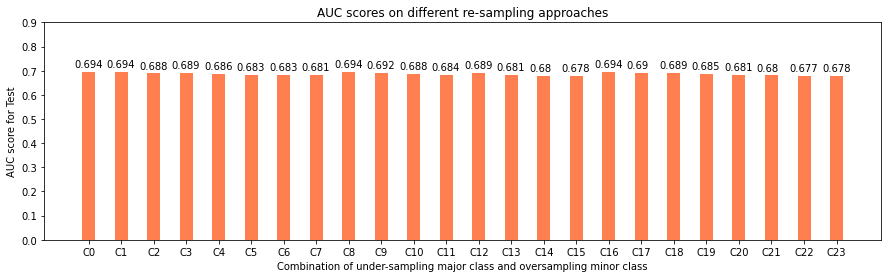

In [ ]:
comb = ['C' + str(i) for i in np.arange(0, 24, 1)]
table['Combination'] = comb

fig = plt.figure(figsize = [15, 4])
plt.bar(table['Combination'], table['AUC Score Test'], color = 'coral', width=0.4)
plt.xlabel('Combination of under-sampling major class and oversampling minor class')
plt.ylabel('AUC score for Test')
plt.title('AUC scores on different re-sampling approaches')
plt.yticks(np.arange(0, 0.95, 0.1))

for i, v in enumerate(table['AUC Score Test']):
  plt.text(i-0.45, v+0.02, str(round(v, 3)))

plt.show()

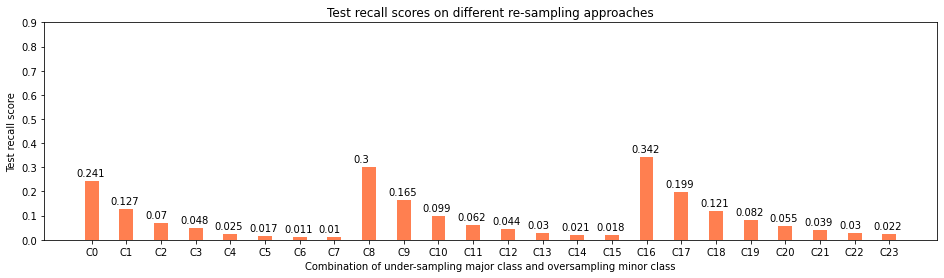

In [ ]:
comb = ['C' + str(i) for i in np.arange(0, 24, 1)]
table['Combination'] = comb

fig = plt.figure(figsize = [16, 4])
plt.bar(table['Combination'], table['Recall test'], color = 'coral', width=0.4)
plt.xlabel('Combination of under-sampling major class and oversampling minor class')
plt.ylabel('Test recall score')
plt.title('Test recall scores on different re-sampling approaches')
plt.yticks(np.arange(0, 0.95, 0.1))

for i, v in enumerate(table['Recall test']):
  plt.text(i-0.45, v+0.02, str(round(v, 3)))

plt.show()

In [ ]:
lrr = LogisticRegression()
# define different parameters
mj_minor_ratio = [0.5,0.75,1.0] # This is a parameter which defines what is the ratio between majority and minority class size in the combined data. 1 means they are equal
# What is the size of the majority that we undersample to? 0.2 means we undersample the majority class to 20% of its original size   
mj_size_pct=np.round(np.arange(0.2, 1.0, 0.1),2) 
omj_size = 223896 # the original majority size
omn_size = 19860  # the original minority size
table1 = pd.DataFrame(columns =['mj_minor_ratio','mj_size_pct', 'Accuracy train', 'Precision train','Recall train',
                               'Accuracy test', 'Precision test','Recall test','AUC Score Test'])

for j in mj_minor_ratio:
    for i in mj_size_pct:
      X_combine, y_combine =combine_smote_usm(X_train.astype('float'),y_train,i,j,omj_size,omn_size)
      lrr.fit(X_combine, y_combine)
      y_train_pred_lr_combine = lrr.predict(X_combine)
      y_test_pred_lr_combine = lrr.predict(X_test)
      y_test_proba_lr_combine = lrr.predict_proba(X_test)
      accu_tr=skm.accuracy_score(y_combine, y_train_pred_lr_combine)
      preci_tr=skm.precision_score(y_combine, y_train_pred_lr_combine)
      recall_tr=skm.recall_score(y_combine, y_train_pred_lr_combine)
      accu_te=skm.accuracy_score(y_test, y_test_pred_lr_combine)
      preci_te=skm.precision_score(y_test, y_test_pred_lr_combine)
      recall_te=skm.recall_score(y_test, y_test_pred_lr_combine)
      auc_te=skm.roc_auc_score(y_test, y_test_proba_lr_combine[:,1])
      row=pd.DataFrame([[j,i,accu_tr,preci_tr,recall_tr,accu_te,preci_te,recall_te,auc_te]],
      columns =['mj_minor_ratio','mj_size_pct', 'Accuracy train', 'Precision train','Recall train',
                'Accuracy test', 'Precision test','Recall test','AUC Score Test'])
      table1=table1.append(row)

ss_usm 0.4435094865473255
ss_smote 0.1


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 44779, 1: 19860})
After smote:  Counter({0: 223896, 1: 22389})


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


ss_usm 0.29567299103155037
ss_smote 0.15


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 67168, 1: 19860})
After smote:  Counter({0: 223896, 1: 33584})


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


ss_usm 0.22175474327366276
ss_smote 0.2


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 89558, 1: 19860})
After smote:  Counter({0: 223896, 1: 44779})


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


ss_usm 0.17740379461893022
ss_smote 0.25


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 111948, 1: 19860})
After smote:  Counter({0: 223896, 1: 55974})


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


ss_usm 0.14783649551577518
ss_smote 0.3


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 134337, 1: 19860})
After smote:  Counter({0: 223896, 1: 67168})


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


ss_usm 0.12671699615637874
ss_smote 0.35


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 156727, 1: 19860})
After smote:  Counter({0: 223896, 1: 78363})
ss_usm 0.11087737163683138
ss_smote 0.4


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 179116, 1: 19860})
After smote:  Counter({0: 223896, 1: 89558})


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


ss_usm 0.09855766367718345
ss_smote 0.45


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 201506, 1: 19860})
After smote:  Counter({0: 223896, 1: 100753})


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


ss_usm 0.4435094865473255
ss_smote 0.15000000000000002


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 44779, 1: 19860})
After smote:  Counter({0: 223896, 1: 33584})


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


ss_usm 0.29567299103155037
ss_smote 0.22499999999999998


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 67168, 1: 19860})
After smote:  Counter({0: 223896, 1: 50376})


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


ss_usm 0.22175474327366276
ss_smote 0.30000000000000004


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 89558, 1: 19860})
After smote:  Counter({0: 223896, 1: 67168})


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


ss_usm 0.17740379461893022
ss_smote 0.375


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 111948, 1: 19860})
After smote:  Counter({0: 223896, 1: 83961})
ss_usm 0.14783649551577518
ss_smote 0.44999999999999996


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 134337, 1: 19860})
After smote:  Counter({0: 223896, 1: 100753})


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


ss_usm 0.12671699615637874
ss_smote 0.5249999999999999


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 156727, 1: 19860})
After smote:  Counter({0: 223896, 1: 117545})
ss_usm 0.11087737163683138
ss_smote 0.6000000000000001


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 179116, 1: 19860})
After smote:  Counter({0: 223896, 1: 134337})


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


ss_usm 0.09855766367718345
ss_smote 0.675


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 201506, 1: 19860})
After smote:  Counter({0: 223896, 1: 151129})


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


ss_usm 0.4435094865473255
ss_smote 0.2


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 44779, 1: 19860})
After smote:  Counter({0: 223896, 1: 44779})
ss_usm 0.29567299103155037
ss_smote 0.3


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 67168, 1: 19860})
After smote:  Counter({0: 223896, 1: 67168})


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


ss_usm 0.22175474327366276
ss_smote 0.4


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 89558, 1: 19860})
After smote:  Counter({0: 223896, 1: 89558})


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


ss_usm 0.17740379461893022
ss_smote 0.5


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 111948, 1: 19860})
After smote:  Counter({0: 223896, 1: 111948})


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


ss_usm 0.14783649551577518
ss_smote 0.6


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 134337, 1: 19860})
After smote:  Counter({0: 223896, 1: 134337})


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


ss_usm 0.12671699615637874
ss_smote 0.7


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 156727, 1: 19860})
After smote:  Counter({0: 223896, 1: 156727})


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


ss_usm 0.11087737163683138
ss_smote 0.8


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 179116, 1: 19860})
After smote:  Counter({0: 223896, 1: 179116})


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


ss_usm 0.09855766367718345
ss_smote 0.9


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After usm:  Counter({0: 201506, 1: 19860})
After smote:  Counter({0: 223896, 1: 201506})


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
table1

,mj_minor_ratio,mj_size_pct,Accuracy train,Precision train,Recall train,Accuracy test,Precision test,Recall test,AUC Score Test
0,0.50,0.2,0.698994,0.598565,0.294430,0.854663,0.217644,0.302115,0.703994
0,0.50,0.3,0.698517,0.594432,0.300738,0.850593,0.214167,0.312387,0.702555
0,0.50,0.4,0.696644,0.587738,0.301213,0.850249,0.213627,0.312588,0.701335
0,0.50,0.5,0.697818,0.589870,0.306696,0.848805,0.212478,0.316213,0.700374
0,0.50,0.6,0.699025,0.592835,0.309939,0.848033,0.210590,0.314804,0.699888
0,0.50,0.7,0.698907,0.592070,0.310976,0.847361,0.210287,0.317019,0.699376
0,0.50,0.8,0.698229,0.590159,0.309900,0.847574,0.210343,0.316213,0.698875
0,0.50,0.9,0.698530,0.590980,0.310462,0.847065,0.208540,0.313797,0.697734
0,0.75,0.2,0.659712,0.630597,0.497320,0.759800,0.170246,0.502920,0.702380
0,0.75,0.3,0.661080,0.631102,0.503494,0.757979,0.168429,0.500504,0.700567


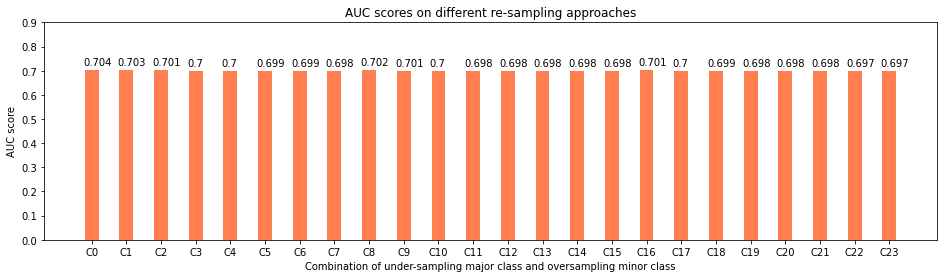

In [ ]:
comb = ['C' + str(i) for i in np.arange(0, 24, 1)]
table1['Combination'] = comb

fig = plt.figure(figsize = [10, 4])
plt.bar(table1['Combination'], table1['AUC Score Test'], color = 'coral', width=0.4)
plt.xlabel('Combination of under-sampling major class and oversampling minor class')
plt.ylabel('AUC score')
plt.title('AUC scores on different re-sampling approaches')
plt.yticks(np.arange(0, 0.95, 0.1))

for i, v in enumerate(table1['AUC Score Test']):
  plt.text(i-0.25, v+0.02, str(round(v, 3)))

plt.show()

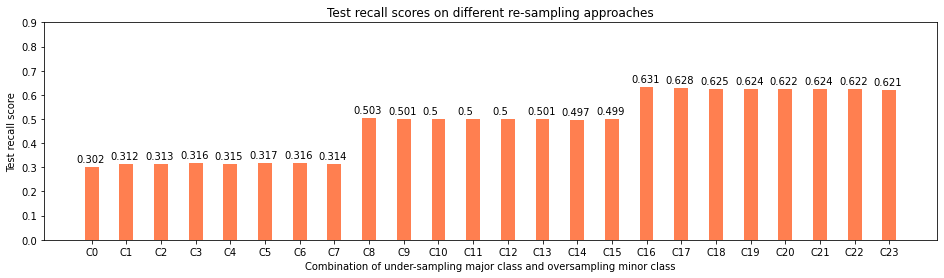

In [ ]:
comb = ['C' + str(i) for i in np.arange(0, 24, 1)]
table1['Combination'] = comb

fig = plt.figure(figsize = [10, 4])
plt.bar(table1['Combination'], table1['Recall test'], color = 'coral')
plt.xlabel('Combination of under-sampling major class and oversampling minor class')
plt.ylabel('Test recall score')
plt.title('Test recall scores on different re-sampling approaches')
plt.yticks(np.arange(0, 0.95, 0.1))

for i, v in enumerate(table1['Recall test']):
  plt.text(i-0.45, v+0.02, str(round(v, 3)))

plt.show()

### Cost-sensitive learning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [ ]:
# Calculate the weights for TARGET 0 and TARGET 1
num_0 = train[train["TARGET"] == 0].shape[0]
num_1 = train[train["TARGET"] == 1].shape[0]

print(num_0/num_1)

# The inverse ratio of data distribution for TARGET 1
weight_0 = 1.0
weight_1 = 1/(num_1/num_0)

print("Weight for TARGET 0:", weight_0)
print("Weight for TARGET 1:", weight_1)

11.273716012084591
Weight for TARGET 0: 1.0
Weight for TARGET 1: 11.273716012084591


In [ ]:
# Prepare weights for algorithms
weights = {0:weight_0, 1:weight_1}

#### Cost-Sensitive Logistic Regression

In [ ]:
# Conduct Grid Search for weights
balance = [{0:1, 1:6}, {0:1, 1:8}, {0:1, 1:10}, {0:1, 1:12}, {0:1, 1:14}]
params = dict(class_weight = balance)

grid_lr = LogisticRegression(max_iter = 500)
grid = GridSearchCV(grid_lr, param_grid=params, cv = 5, verbose = 0, scoring= 'roc_auc')
grid_result = grid.fit(X_train, y_train)

In [ ]:
print("Best score:", grid_result.best_score_)
print("Best parameter:", grid_result.best_params_)

Best score: 0.6985564521526829
Best parameter: {'class_weight': {0: 1, 1: 8}}


The best parameter: {'class_weight': {0: 1, 1: 8}}
<br>The AUC score for best parameter is not as good as the AUC score for {'class_weight': {0: 1, 1: 11.273716012084591}}

balance = [{0:1, 1:10}, {0:1, 1:50}, {0:1, 1:100}, {0:1, 1:150}, {0:1, 1:200}] has been used to do gridsearch, the best parameter is still: {'class_weight': {0: 1, 1: 10}}

In [ ]:
# Weighted Logistic Regression
wlr = LogisticRegression(random_state = 23, class_weight=weights, max_iter = 500)

wlr.fit(X_train, y_train)

y_train_pred_wlr = wlr.predict(X_train)
y_test_pred_wlr = wlr.predict(X_test)

y_train_proba_wlr = wlr.predict_proba(X_train)
y_test_proba_wlr = wlr.predict_proba(X_test)

In [ ]:
print("Train Confusion Matrix: \n", skm.confusion_matrix(y_train, y_train_pred_wlr))
print("Accuracy Train:", skm.accuracy_score(y_train, y_train_pred_wlr))
print("Precision Train:", skm.precision_score(y_train, y_train_pred_wlr))
print("Recall Train:", skm.recall_score(y_train, y_train_pred_wlr))
print("AUC score", skm.roc_auc_score(y_train, y_train_proba_wlr[:,1]))

print("\n Test Confusion Matrix: \n", skm.confusion_matrix(y_test, y_test_pred_wlr))
print("Accuracy Test:", skm.accuracy_score(y_test, y_test_pred_wlr))
print("Precision Test:", skm.precision_score(y_test, y_test_pred_wlr))
print("Recall Test:", skm.recall_score(y_test, y_test_pred_wlr))
print("AUC score", skm.roc_auc_score(y_test, y_test_proba_wlr[:,1]))

Train Confusion Matrix: 
 [[148276  75620]
 [  7359  12501]]
Accuracy Train: 0.6595817128604013
Precision Train: 0.1418617582642049
Recall Train: 0.6294561933534744
AUC score 0.7000718881457371

 Test Confusion Matrix: 
 [[37274 18702]
 [ 1818  3147]]
Accuracy Test: 0.6632808782264813
Precision Test: 0.14403405190168886
Recall Test: 0.6338368580060423
AUC score 0.7044255803199213


#### Cost-Sensitive Random Forest

In [ ]:
# Conduct Grid Search for weights
balance = [{0:1, 1:10}, {0:1, 1:50}, {0:1, 1:100}, {0:1, 1:150}, {0:1, 1:200}]
params = dict(class_weight = balance)

grid_rf = RandomForestClassifier(random_state = 23)
grid1 = GridSearchCV(grid_rf, param_grid=params, cv = 5, verbose = 0, scoring= 'roc_auc')
grid_result1 = grid1.fit(X_train, y_train)

In [ ]:
print("Best score:", grid_result1.best_score_)
print("Best parameter:", grid_result1.best_params_)

Best score: 0.6758618296385793
Best parameter: {'class_weight': {0: 1, 1: 10}}


In [ ]:
# Conduct Grid Search for weights
balance2 = [{0:1, 1:4}, {0:1, 1:6}, {0:1, 1:8}, {0:1, 1:10}, {0:1, 1:12}, {0:1, 1:14}]
params2 = dict(class_weight = balance2)

grid_rf2 = RandomForestClassifier(random_state = 23)
grid2 = GridSearchCV(grid_rf2, param_grid=params2, cv = 5, verbose = 0, scoring= 'roc_auc')
grid_result2 = grid2.fit(X_train, y_train)

In [ ]:
print("Best score:", grid_result2.best_score_)
print("Best parameter:", grid_result2.best_params_)

Best score: 0.6782121650932318
Best parameter: {'class_weight': {0: 1, 1: 12}}


In [ ]:
wrf2 = grid_result2.best_estimator_

In [ ]:
y_train_pred_wrf2 = wrf2.predict(X_train)
y_test_pred_wrf2 = wrf2.predict(X_test)

y_train_proba_wrf2 = wrf2.predict_proba(X_train)
y_test_proba_wrf2 = wrf2.predict_proba(X_test)

In [ ]:
print("Train Confusion Matrix: \n", skm.confusion_matrix(y_train, y_train_pred_wrf2))
print("Accuracy Train:", skm.accuracy_score(y_train, y_train_pred_wrf2))
print("Precision Train:", skm.precision_score(y_train, y_train_pred_wrf2))
print("Recall Train:", skm.recall_score(y_train, y_train_pred_wrf2))
print("AUC score", skm.roc_auc_score(y_train, y_train_proba_wrf2[:,1]))
print("\n Test Confusion Matrix: \n", skm.confusion_matrix(y_test, y_test_pred_wrf2))
print("Accuracy Test:", skm.accuracy_score(y_test, y_test_pred_wrf2))
print("Precision Test:", skm.precision_score(y_test, y_test_pred_wrf2))
print("Recall Test:", skm.recall_score(y_test, y_test_pred_wrf2))
print("AUC score", skm.roc_auc_score(y_test, y_test_proba_wrf2[:,1]))

Train Confusion Matrix: 
 [[223896      0]
 [    13  19847]]
Accuracy Train: 0.9999466679794549
Precision Train: 1.0
Recall Train: 0.9993454179254784
AUC score 1.0

 Test Confusion Matrix: 
 [[55976     0]
 [ 4964     1]]
Accuracy Test: 0.9185441656684334
Precision Test: 1.0
Recall Test: 0.0002014098690835851
AUC score 0.6830268054025743


In [ ]:
# Weighted Random Forest
wrf = RandomForestClassifier(random_state = 23, class_weight=weights)

wrf.fit(X_train, y_train)

y_train_pred_wrf = wrf.predict(X_train)
y_test_pred_wrf = wrf.predict(X_test)
y_test_proba_wrf= wrf.predict_proba(X_test)

In [ ]:
print("Train Confusion Matrix: \n", skm.confusion_matrix(y_train, y_train_pred_wrf))
print("Accuracy Train:", skm.accuracy_score(y_train, y_train_pred_wrf))
print("Precision Train:", skm.precision_score(y_train, y_train_pred_wrf))
print("Recall Train:", skm.recall_score(y_train, y_train_pred_wrf))
print("\n Test Confusion Matrix: \n", skm.confusion_matrix(y_test, y_test_pred_wrf))
print("Accuracy Test:", skm.accuracy_score(y_test, y_test_pred_wrf))
print("Precision Test:", skm.precision_score(y_test, y_test_pred_wrf))
print("Recall Test:", skm.recall_score(y_test, y_test_pred_wrf))
print("AUC score", skm.roc_auc_score(y_test, y_test_proba_wrf[:,1]))

Train Confusion Matrix: 
 [[223896      0]
 [     6  19854]]
Accuracy Train: 0.9999753852212868
Precision Train: 1.0
Recall Train: 0.9996978851963746

 Test Confusion Matrix: 
 [[55975     1]
 [ 4961     4]]
Accuracy Test: 0.9185769842962865
Precision Test: 0.8
Recall Test: 0.0008056394763343404
AUC score 0.6826846414252346
